In [136]:
"""
Vamos a probar distintas estrategias de TAA utilizando el mismo universo de instrumentos: 

Long List

1. Goldman Sachs Commodity Index ETF - $GSG 
2. US Large Cap - $SPY
3. US Small Cap - $IWM
4. Foreign Stocks - $EFA 
5. Gold - $GLD 
6. Treasury Bonds 20Y+ - $TLT 
7. Total Bonds - $BND 

Short list

8. Short Commodity - $SALL --tbd
9. Short S&P 500 - $SH
10. Short Russel - $RWM
11. Short EAFE - $EFZ
12. Short Gold - $GLL
13. Short Treasury Bonds 20Y+ - $TBF
14. Short Total Bonds - $PST


"""

'\nVamos a probar distintas estrategias de TAA utilizando el mismo universo de instrumentos: \n\nLong List\n\n1. Goldman Sachs Commodity Index ETF - $GSG \n2. US Large Cap - $SPY\n3. US Small Cap - $IWM\n4. Foreign Stocks - $EFA \n5. Gold - $GLD \n6. Treasury Bonds 20Y+ - $TLT \n7. Total Bonds - $BND \n\nShort list\n\n8. Short Commodity - $SALL --tbd\n9. Short S&P 500 - $SH\n10. Short Russel - $RWM\n11. Short EAFE - $EFZ\n12. Short Gold - $GLL\n13. Short Treasury Bonds 20Y+ - $TBF\n14. Short Total Bonds - $PST\n\n\n'

In [137]:
import pandas as pd
import yfinance as yf
import requests
import json 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [138]:
ticker_universe = ['GSG','SPY','IWM','EFA','GLD','TLT','BND','SH','RWM','EFZ','GLL','TBF','PST']
index_universe = ['GSG','SPY','IWM','EFA','GLD','TLT','BND']
fecha_fin_calculo = (datetime.now() - timedelta(days= 1)).strftime('%Y-%m-%d')
fecha_inicio_calculo = '2010-01-01'
multiple = yf.download(ticker_universe, start=fecha_inicio_calculo, end=fecha_fin_calculo)

[*********************100%%**********************]  13 of 13 completed


In [139]:
multiple_close = multiple['Adj Close'].copy()
multiple_returns = multiple_close.pct_change()
multiple_close.fillna(method='bfill',inplace=True)

C:\Users\ftgon\AppData\Local\Temp\ipykernel_14772\1122856076.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  multiple_close.fillna(method='bfill',inplace=True)


In [140]:
multiple_returns['SIndex'] = multiple_returns[index_universe].mean(axis=1)
multiple_returns.drop(multiple_returns.index[0], inplace=True)
multiple_returns.fillna(0,inplace=True)

In [141]:
precios_base = 100  # Precio inicial base para cada ETF
precios_acumulados = (1 + multiple_returns).cumprod() * precios_base

<Axes: xlabel='Date'>

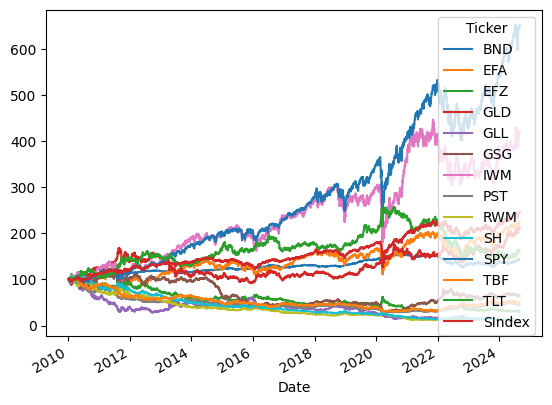

In [142]:
precios_acumulados.plot()

In [143]:

# Calcular el cambio porcentual en intervalos de 5, 25, 40, y 65 días para cada columna (ETF)
df_change_5 = precios_acumulados.pct_change(periods=5)
df_change_25 = precios_acumulados.pct_change(periods=25)
df_change_40 = precios_acumulados.pct_change(periods=40)
df_change_65 = precios_acumulados.pct_change(periods=65)
df_change_130 = precios_acumulados.pct_change(periods=130)
df_change_200 = precios_acumulados.pct_change(periods=200)
df_change_260 = precios_acumulados.pct_change(periods=260)

# Generar rankings RS para cada intervalo 
df_rs_5 = df_change_5.dropna().rank(axis=1, method='min', ascending=True).astype(int)
df_rs_25 = df_change_25.dropna().rank(axis=1, method='min', ascending=True).astype(int)
df_rs_40 = df_change_40.dropna().rank(axis=1, method='min', ascending=True).astype(int)
df_rs_65 = df_change_65.dropna().rank(axis=1, method='min', ascending=True).astype(int)
df_rs_130 = df_change_130.dropna().rank(axis=1, method='min', ascending=True).astype(int)
df_rs_200 = df_change_200.dropna().rank(axis=1, method='min', ascending=True).astype(int)
df_rs_260 = df_change_260.dropna().rank(axis=1, method='min', ascending=True).astype(int)

# Renombrar las columnas para indicar el intervalo de cambio
df_change_5 = df_change_5.add_suffix('_5d_change')
df_change_25 = df_change_25.add_suffix('_25d_change')
df_change_40 = df_change_40.add_suffix('_40d_change')
df_change_65 = df_change_65.add_suffix('_65d_change')
df_change_130 = df_change_130.add_suffix('_130d_change')
df_change_200 = df_change_200.add_suffix('_200d_change')
df_change_260 = df_change_260.add_suffix('_260d_change')

df_rs_5 = df_rs_5.add_suffix('_5d_rs')
df_rs_25 = df_rs_25.add_suffix('_25d_rs')
df_rs_40 = df_rs_40.add_suffix('_40d_rs')
df_rs_65 = df_rs_65.add_suffix('_65d_rs')
df_rs_130 = df_rs_130.add_suffix('_130d_rs')
df_rs_200 = df_rs_200.add_suffix('_200d_rs')
df_rs_260 = df_rs_260.add_suffix('_260d_rs')


# Combinar los dataframes de cambios porcentuales en uno solo
df_changes = pd.concat([df_change_5, df_change_25, df_change_40, df_change_65, df_change_130, df_change_200, df_change_260], axis=1)
df_rs = pd.concat([df_rs_5, df_rs_25, df_rs_40, df_rs_65, df_rs_130, df_rs_200, df_rs_260], axis=1)

# Calcular RS para cada ETF
for etf in precios_acumulados.columns:
    df_changes[f'{etf}_RS'] = (2 * (df_rs[f'{etf}_5d_rs'] + df_rs[f'{etf}_25d_rs'] +
                                   df_rs[f'{etf}_40d_rs'] + df_rs[f'{etf}_65d_rs']) +
                               (df_rs[f'{etf}_130d_rs'] + df_rs[f'{etf}_200d_rs'] +
                                df_rs[f'{etf}_260d_rs'])) / 11



In [144]:
df_changes.dropna(axis=0, inplace=True) 

In [145]:

# Crear un nuevo dataframe para las ponderaciones
df_ponderaciones = pd.DataFrame(index=df_changes.index, columns=ticker_universe)

# Iterar sobre cada fecha en el dataframe
for date in df_changes.index:
    # Extraer las columnas que terminan en '_RS' y no comienzan con 'SIndex'
    rs_columns = [col for col in df_changes.columns if col.endswith('_RS') and not col.startswith('SIndex')]

    change_200d_columns = [col for col in df_changes.columns if col.endswith('_200d_change') and not col.startswith('SIndex')]

    
    # Filtrar los ETFs cuyo valor RS sea superior al valor de SIndex_RS en la fecha actual
    etfs_rs_superior = df_changes.loc[date, rs_columns] > df_changes.loc[date, 'SIndex_RS']
    
    
    # Filtrar los ETFs cuyo cambio porcentual de 25 días sea positivo en la fecha actual
    etfs_200d_positive = df_changes.loc[date, change_200d_columns] > 0
    
    # Crear una lista de ETFs que cumplen ambos criterios
    selected_etfs_rs = etfs_rs_superior[etfs_rs_superior].index.tolist()
    selected_etfs_rs = [etf.replace('_RS','') for etf in selected_etfs_rs]
    selected_etfs_200d = etfs_200d_positive[etfs_200d_positive].index.to_list()
    selected_etfs_200d = [etf.replace('_200d_change','') for etf in selected_etfs_200d]
    
    # Encontrar los ETFs comunes en ambos filtros
    selected_etfs = list(set(selected_etfs_rs) & set(selected_etfs_200d))

    
    # Eliminar sufijos '_RS' o '_5d_change' para obtener nombres de ETF limpios
    etfs_seleccionados = [etf.replace('_RS', '').replace('_200d_change', '') for etf in selected_etfs]
    
    # Debug: Imprimir ETFs seleccionados para la fecha actual
    print(f"Fecha: {date}, ETFs seleccionados: {etfs_seleccionados}")
    
    if len(etfs_seleccionados) > 0:
        # Calcular la suma de los valores RS de los ETFs seleccionados en la fecha actual
        rs_total = df_changes.loc[date, [f'{etf}_RS' for etf in etfs_seleccionados]].sum()
        
        # Calcular las ponderaciones para los ETFs seleccionados en la fecha actual
        for etf in etfs_seleccionados:
            #df_ponderaciones.loc[date, etf] = df_changes.loc[date, f'{etf}_RS'] / rs_total
            df_ponderaciones.loc[date, etf] = 1/ len(etfs_seleccionados)
    else:
        # Debug: Imprimir mensaje si no hay ETFs seleccionados
        print(f"Fecha: {date} - No se seleccionaron ETFs.")

# Rellenar NaN con 0 para ETFs no seleccionados
df_ponderaciones = df_ponderaciones.fillna(0)


Fecha: 2011-01-14 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-18 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-19 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-20 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-21 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-24 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-25 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-26 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-27 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-28 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-01-31 00:00:00, ETFs seleccionados: ['GSG', 'IWM', 'SPY']
Fecha: 2011-02-01 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha: 2011-02-02 00:00:00, ETFs seleccionados: ['EFA', 'GSG', 'IWM', 'SPY']
Fecha:

In [146]:
portfolio_value = multiple_returns.loc[df_ponderaciones.index].copy()
portfolio_value = portfolio_value.add_suffix('_Ret')
portfolio_value = pd.concat([portfolio_value, df_ponderaciones], axis=1)
portfolio_value['Equity'] = pd.NA
portfolio_value.loc[portfolio_value.index[0],'Equity'] = 10000

In [150]:
portfolio_value

,BND_Ret,EFA_Ret,EFZ_Ret,GLD_Ret,GLL_Ret,GSG_Ret,IWM_Ret,PST_Ret,RWM_Ret,SH_Ret,...,GLD,TLT,BND,SH,RWM,EFZ,GLL,TBF,PST,Equity
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-14,-0.001368,0.006093,-0.005885,-0.010145,0.019852,0.007860,0.007506,0.004524,-0.006359,-0.006755,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000
2011-01-18,-0.000996,0.006560,-0.006124,0.005577,-0.011877,-0.002888,0.000745,0.005926,-0.002880,-0.002110,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10015.295113
2011-01-19,0.001246,-0.006852,0.006367,0.002173,-0.003005,-0.002028,-0.025682,-0.004477,0.025995,0.009871,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9904.206982
2011-01-20,-0.003734,-0.008582,0.007755,-0.018845,0.037173,-0.011321,-0.010442,0.014438,0.019393,0.001396,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9825.790728
2011-01-21,0.001999,0.005431,-0.004860,-0.001296,0.001937,0.006459,-0.006691,-0.005599,-0.001227,-0.002092,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9844.123518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,-0.001070,-0.004468,0.004476,0.003189,-0.005311,0.014184,0.000318,0.001369,0.000000,0.004484,...,0.20,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11341.093409
2024-08-27,0.000000,0.004609,-0.005092,0.002707,-0.005339,-0.006061,-0.007757,0.001822,0.007809,-0.002679,...,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11339.278063
2024-08-28,-0.000670,-0.003501,0.004479,-0.007027,0.014493,-0.011726,-0.006766,0.001819,0.006715,0.007162,...,0.20,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11286.780078


In [148]:
weight_columns = ticker_universe
ret_columns = [etf + '_Ret' for etf in weight_columns]

# Iterar sobre cada fila a partir de la segunda
for i in range(1, len(portfolio_value)):
    # Inicializar el valor de Equity para la fila actual
    equity_sum = 0
    
    # Iterar sobre cada ETF para calcular el sumatorio
    for ret_col, weight_col in zip(ret_columns, weight_columns):
        equity_sum += (
            (portfolio_value.loc[portfolio_value.index[i - 1], 'Equity'] *
            portfolio_value.loc[portfolio_value.index[i - 1], weight_col]) *
            portfolio_value.loc[portfolio_value.index[i], ret_col]
        )
    
    # Asignar el valor calculado a la columna 'Equity' en la fila actual
    portfolio_value.loc[portfolio_value.index[i], 'Equity'] = equity_sum + portfolio_value.loc[portfolio_value.index[i - 1], 'Equity']

<Axes: xlabel='Date'>

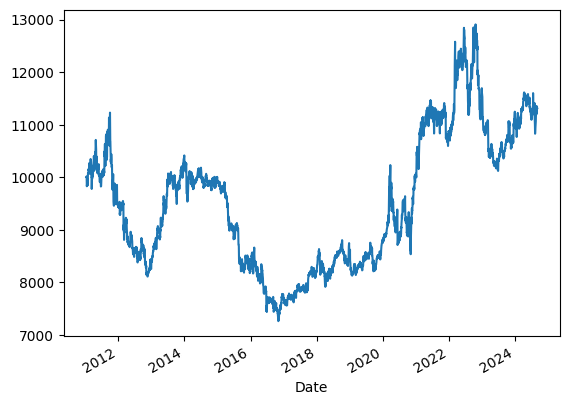

In [149]:
portfolio_value['Equity'].plot()